In [8]:
import pandas as pd

load and prepare the data

In [9]:
df = pd.read_csv('../data/TSLA_historical_data.csv')

Convert the 'Date' column to datetime format

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df = df.sort_values('Date')

check the data and Ensure includes columns like Open, High, Low, Close, and Volume

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0


#Apply Analysis Indicators with TA-Lib

In [10]:
import talib as ta

Calculate the 20-day Simple Moving Average (SMA)

In [34]:

df['SMA_20'] = ta.SMA(df['Close'], timeperiod=20)
df['EMA_20'] = ta.EMA(df['Close'], timeperiod=20)

Calculate the 14-day Relative Strength Index (RSI)

In [35]:
df['RSI_14'] = ta.RSI(df['Close'], timeperiod=14)

In [36]:
# Calculate the MACD, MACD Signal, and MACD Histogram
df['MACD'], df['MACD_signal'], df['MACD_hist'] = ta.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)


 Display the first few rows with the new indicators

In [41]:
df = df.dropna(subset=['SMA_20'])
df = df.dropna(subset=['EMA_20'])
df = df.dropna(subset=['MACD'])
df = df.dropna(subset=['MACD_signal'])
df = df.dropna(subset=['MACD_hist'])
print(df[['Date', 'Close', 'SMA_20', 'EMA_20', 'RSI_14', 'MACD', 'MACD_signal', 'MACD_hist']].head(25))


          Date     Close    SMA_20    EMA_20     RSI_14      MACD  \
66  2010-10-01  1.373333  1.382133  1.368778  52.056543  0.023779   
67  2010-10-04  1.399333  1.381933  1.371688  54.360657  0.023375   
68  2010-10-05  1.408000  1.383867  1.375147  55.134699  0.023483   
69  2010-10-06  1.364000  1.382400  1.374085  50.456177  0.019790   
70  2010-10-07  1.362000  1.381467  1.372934  50.247461  0.016512   
71  2010-10-08  1.362000  1.382333  1.371893  50.247461  0.013755   
72  2010-10-11  1.349333  1.380733  1.369744  48.765725  0.010428   
73  2010-10-12  1.349333  1.377800  1.367800  48.765725  0.007703   
74  2010-10-13  1.369333  1.373000  1.367946  51.390575  0.007075   
75  2010-10-14  1.383333  1.372367  1.369412  53.198118  0.007619   
76  2010-10-15  1.369333  1.373400  1.369404  51.149803  0.006842   
77  2010-10-18  1.348667  1.370633  1.367429  48.199555  0.004507   
78  2010-10-19  1.336667  1.368233  1.364499  46.521595  0.001669   
79  2010-10-20  1.376667  1.370833

Create visualizations to better understand the data and the impact of different indicators on the stock price

Plot the stock price along with the moving averages


SMA (Simple Moving Average) and EMA (Exponential Moving Average)

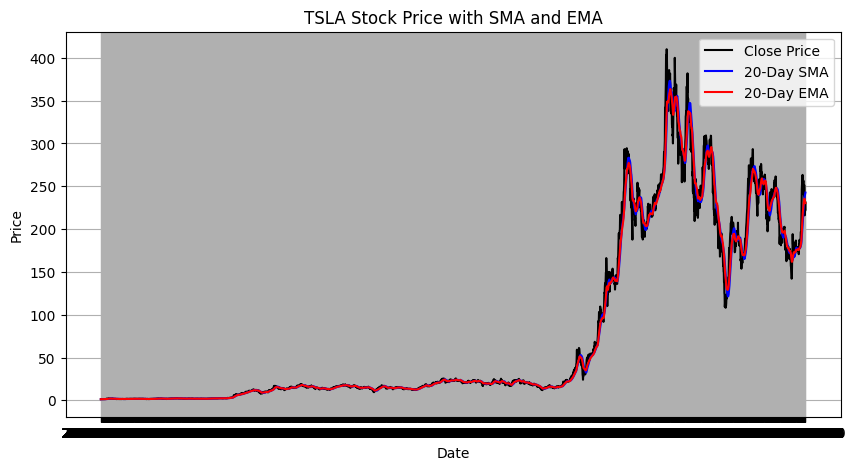

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], label='Close Price', color='black')
plt.plot(df['Date'], df['SMA_20'], label='20-Day SMA', color='blue')
plt.plot(df['Date'], df['EMA_20'], label='20-Day EMA', color='red')
plt.title('TSLA Stock Price with SMA and EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Plot RSI (Relative Strength Index)

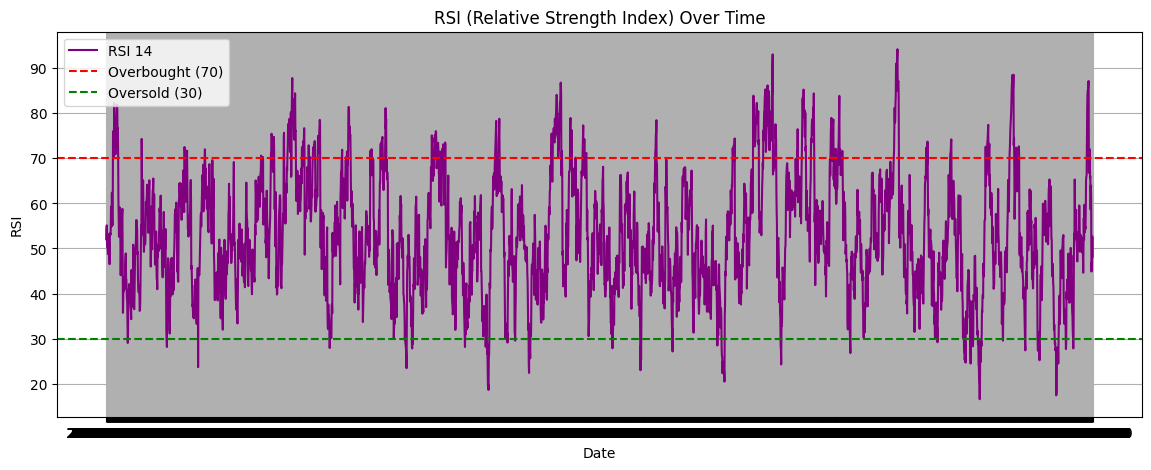

In [51]:

plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['RSI_14'], label='RSI 14', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('RSI (Relative Strength Index) Over Time')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

Plot MACD (Moving Average Convergence Divergence)

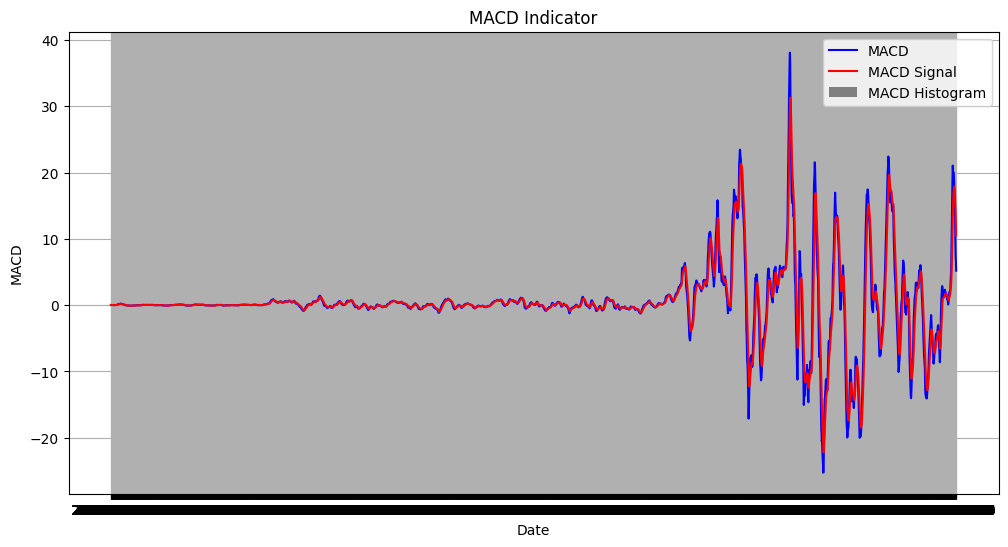

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['MACD'], label='MACD', color='blue')
plt.plot(df['Date'], df['MACD_signal'], label='MACD Signal', color='red')
plt.bar(df['Date'], df['MACD_hist'], label='MACD Histogram', color='gray')
plt.title('MACD Indicator')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.grid(True)
plt.show()